In [2]:
import pandas as pd
import numpy as np
import os , shutil
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:00<00:00, 176MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [4]:
train_path = path + '/Training'
test_path = path + '/Testing'
train = os.path.join(path , 'Training')
test = os.path.join(path , 'Testing')

In [5]:

for filename in os.listdir(train):
    print(filename)

glioma
pituitary
notumor
meningioma


In [18]:
train = tf.keras.preprocessing.image_dataset_from_directory(train_path )
test = tf.keras.preprocessing.image_dataset_from_directory(test_path )
train = train.map(lambda x, y: (x / 255, y))
test = test.map(lambda x, y: (x / 255, y))
train_iteration = train.as_numpy_iterator()
test_iteration = test.as_numpy_iterator()
train_batch = train_iteration.next()
test_batch = test_iteration.next()


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [19]:
print(test_batch[0].max())

1.0


In [20]:
len(train) #How many Batches (multiply by 32 if you working with the deafault parameters to get the number of Files)

179

In [21]:
#The train set will stay the same while deviding the test into val and test
#5712/(5712+1311) = 0.8 Which mean that the training data is 80%
val = test.take(int(len(test)*0.5))
test = test.skip(int(len(test)*0.5))

In [22]:
model = Sequential([
    Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(128, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
log_dir = 'logs'
tensorboard_callback = TensorBoard(log_dir=log_dir)
hist = model.fit(train, epochs=10, validation_data=val , callbacks=[tensorboard_callback])

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 151ms/step - accuracy: 0.6293 - loss: 0.9508 - val_accuracy: 0.8297 - val_loss: 0.4179
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.9064 - loss: 0.2483 - val_accuracy: 0.9281 - val_loss: 0.1916
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9567 - loss: 0.1208 - val_accuracy: 0.9500 - val_loss: 0.1360
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.9697 - loss: 0.0812 - val_accuracy: 0.9672 - val_loss: 0.1051
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 122ms/step - accuracy: 0.9868 - loss: 0.0459 - val_accuracy: 0.9563 - val_loss: 0.1343
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9641 - val_loss: 0.1517
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9954 - loss: 0.0150 - val_accuracy: 0.9516 - val_loss: 0.1419
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.9946 - loss: 0

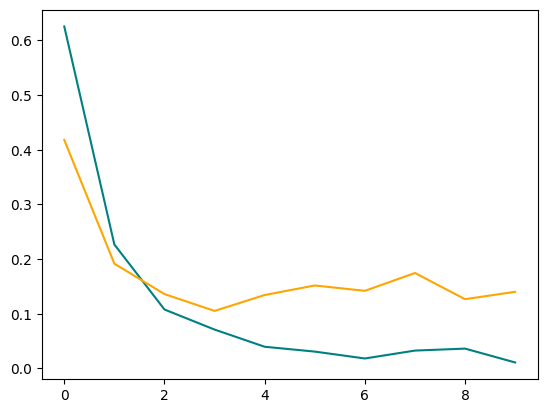

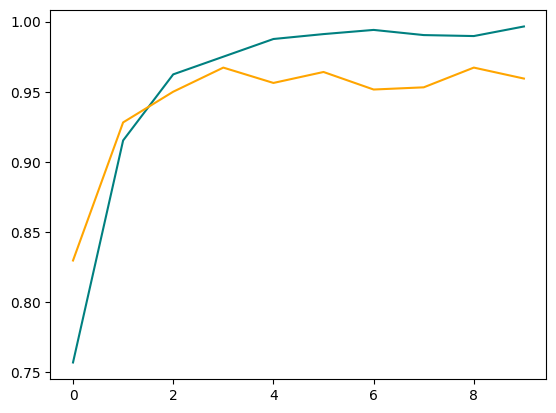

In [24]:
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
for batch in test.as_numpy_iterator():
  pre = Precision()
  re = Recall()
  acc = BinaryAccuracy()
  X ,y = batch
  yhat = model.predict(X)
  y = tf.one_hot(y, depth=4)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [26]:
print(f'Precision {pre.result().numpy()} , Recall {re.result().numpy()} , Accuracy {acc.result().numpy()}')

Precision 1.0 , Recall 1.0 , Accuracy 1.0


In [27]:
import numpy as np

# Get the remaining batches from test_iteration
remaining_batches = list(test.as_numpy_iterator())  # Get remaining batches

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Process the first batch (test_batch)
X, y = test_batch
yhat = model.predict(X)
y_true.extend(y)
y_pred.extend(np.argmax(yhat, axis=1))

# Process remaining batches
for batch in remaining_batches:
    X, y = batch
    yhat = model.predict(X)
    y_true.extend(y)
    y_pred.extend(np.argmax(yhat, axis=1))

# Convert to NumPy arrays for easier handling
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print the predictions and true labels
print("True Labels:", y_true)
print("Predicted Labels:", y_pred)

# You can further analyze the predictions using metrics, confusion matrix, etc.
# For example, to calculate accuracy:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

temp_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path, shuffle=False, batch_size=1
)
class_names = temp_dataset.class_names
print("Class Names:", class_names)

# To print predictions with class names:
for i in range(len(y_true)):
  true_class = class_names[y_true[i]]
  predicted_class = class_names[y_pred[i]]
  print(f"Sample {i}: True Class = {true_class}, Predicted Class = {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
True Labels: [3 2 2 1 1 1 3 3 0 2 0 1 3 0 0 3 2 2 3 1 0 0 0 3 0 2 1 1 3 0 0 0 3 0 2 2 2
 3 2 1 3 3 1 1 3 1 3 1 0 0 0 0 3 3 0 3 1 1 2 2 0 0 2 3 1 3 1 1 3 3 2 2 0 0
 

In [29]:
model.save('brain_tumor_model.keras')